# Projeto de Disciplina - Algoritmos de Inteligência Artificial para Clusterização [25E4_2]

## Infraestrutura

Para as questões a seguir, você deverá executar códigos em um notebook Jupyter, rodando em ambiente local, certifique-se que:

1. Você está rodando em Python 3.9+
> Respondido no item 5.
2. Você está usando um ambiente virtual: Virtualenv ou Anaconda
> Respondido no item 3 e 5.
3. Todas as bibliotecas usadas nesse exercícios estão instaladas em um ambiente virtual específico

> ![printscreen3](images/printscreen3.png "printscreen3")

4. Gere um arquivo de requerimentos (requirements.txt) com os pacotes necessários. É necessário se certificar que a versão do pacote está disponibilizada.
> [requirements.txt](requirements.txt)
5. Tire um printscreen do ambiente que será usado rodando em sua máquina.

![printscreen1](images/printscreen1.png "printscreen1")
![printscreen2](images/printscreen2.png "printscreen2")
![printscreen4](images/printscreen4.png "printscreen4")

6. Disponibilize os códigos gerados, assim como os artefatos acessórios (requirements.txt) e instruções em um repositório GIT público. (se isso não for feito, o diretório com esses arquivos deverá ser enviado compactado no moodle).

> https://github.com/rabreu/Infnet-MIT-IA-Clustering-PD-25E4_2

## Escolha de base de dados

Para as questões a seguir, usaremos uma base de dados e faremos a análise exploratória dos dados, antes da clusterização.

1. Baixe os dados disponibilizados na plataforma Kaggle sobre dados sócio-econômicos e de saúde que determinam o índice de desenvolvimento de um país. Esses dados estão disponibilizados através do link: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data
2. Quantos países existem no dataset?
> [Definição da quantidade de países como variável global](#Definição-da-quantidade-de-países-como-variável-global)
3. Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?
> [Análise da distribuição da-massa de dados](#Análise-da-distribuição-da-massa-de-dados)
4. Realize o pré-processamento adequado dos dados.
> [Pré-processamento da massa de dados](#Pré-processamento-da-massa-de-dados)

## Clusterização

Para os dados pré-processados da etapa anterior você irá:

1. Realizar o agrupamento dos países em 3 grupos distintos. Para tal, use:
    - K-Médias
      > [Execução K-Means, Hierarquical Agglomerative e DBSCAN para k=3](#Execução-K-Means,-Hierarquical-Agglomerative-e-DBSCAN-para-k=3)
    - Clusterização Hierárquica
      > [Execução K-Means, Hierarquical Agglomerative e DBSCAN para k=3](#Execução-K-Means,-Hierarquical-Agglomerative-e-DBSCAN-para-k=3)
2. Para os resultados, do K-Médias:
    - Interprete cada um dos clusters obtidos citando:
      - Qual a distribuição das dimensões em cada grupo
        > Podemos separar três grupos por diferenças socioeconomicas: Países desenvolvidos, em desenvolvimento e subdesenvolvidos.
      - O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique
3. Para os resultados da Clusterização Hierárquica, apresente o dendograma e interprete os resultados
> [Dendrogramas e Análise](#Dendrogramas-e-Análise)
4. Compare os dois resultados, aponte as semelhanças e diferenças e interprete.
> [Comparação entre K-Means e Hierarchical Agglomerative](#Comparação-entre-K-Means-e-Hierarchical-Agglomerative)

## Escolha de algoritmos

1. Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.
    > - Escolher o número de clusters K.
    > - Selecionar centróides iniciais.
    > - Atribuir cada ponto ao centróide mais próximo.
    > - Recalcular os centróides (média dos pontos).
    > - Repetir até os centróides não mudarem mais.
2. O algoritmo de K-médias converge até encontrar os centróides que melhor descrevem os clusters encontrados (até o deslocamento entre as interações dos centróides ser mínimo). Lembrando que o centróide é o baricentro do cluster em questão e não representa, em via de regra, um dado existente na base. Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo. Obs: nesse novo algoritmo, o dado escolhido será chamado medóide.
    > - Escolher K pontos reais como medóides.
    > - Atribuir cada ponto ao medóide mais próximo.
    > - Calcular o novo medóide (ponto real mais próximo do centro).
    > - Repetir até os medóides não mudarem mais.
3. O algoritmo de K-médias é sensível a outliers nos dados. Explique.
    > Sim. As médias dos _outliers_ acabam _puxando_ o centróide para fora do centro causando uma distorção.
4. Por que o algoritmo de DBScan é mais robusto à presença de outliers?
    > Porque ele não se baseia em média - que é a raiz do problema acima - mas na densidade (parâmetro _eps/epsilon_), entretanto é necessário ajustar essa entrada dependendo dos objetivos da análise.

Assim que terminar, salve o seu arquivo PDF e poste no Moodle. Utilize o seu nome para nomear o arquivo, identificando também a disciplina no seguinte formato: “nomedoaluno_nomedadisciplina_pd.PDF”.

## Importação de bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.datasets import make_blobs
from sklearn import preprocessing as preproc
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
from sklearn.decomposition import PCA

# Macros
RIGHT_dec_format = lambda x: x.__str__().replace(',','').replace('.',',')

In [2]:
print("Pandas version:", pd.__version__)
print("Matplotlib version:", plt.matplotlib.__version__)
print("Seaborn version:", sb.__version__)
print("Numpy version:", np.__version__)

Pandas version: 2.3.3
Matplotlib version: 3.10.7
Seaborn version: 0.13.2
Numpy version: 1.26.4


## Importação e Normalização dos Dados

In [3]:
csv = pd.read_csv("datasets/Country-data.csv")
labels = pd.read_csv("datasets/data-dictionary.csv")
dataset_raw = pd.DataFrame(csv)
labels = pd.DataFrame(labels)

In [4]:
dataset_raw.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
dataset_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


### Definição da quantidade de países como variável global

Define como variável global a quantidade de países para usá-la como entrada na quantidade de amostras (_n_samples_):

In [6]:
N_COUNTRIES=dataset_raw['country'].count()

### Pré-processamento da massa de dados

In [7]:
dataset = preproc.StandardScaler().fit_transform(dataset_raw.iloc[:,1:])
dataset

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [8]:
dataset = pd.DataFrame(dataset, columns=labels.iloc[1:, 0].apply(lambda column : column.lower()))
dataset

Column Name,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [9]:
pca_2 = PCA(n_components=2)
dataset_pca = pca_2.fit_transform(dataset)

### Análise da distribuição da massa de dados

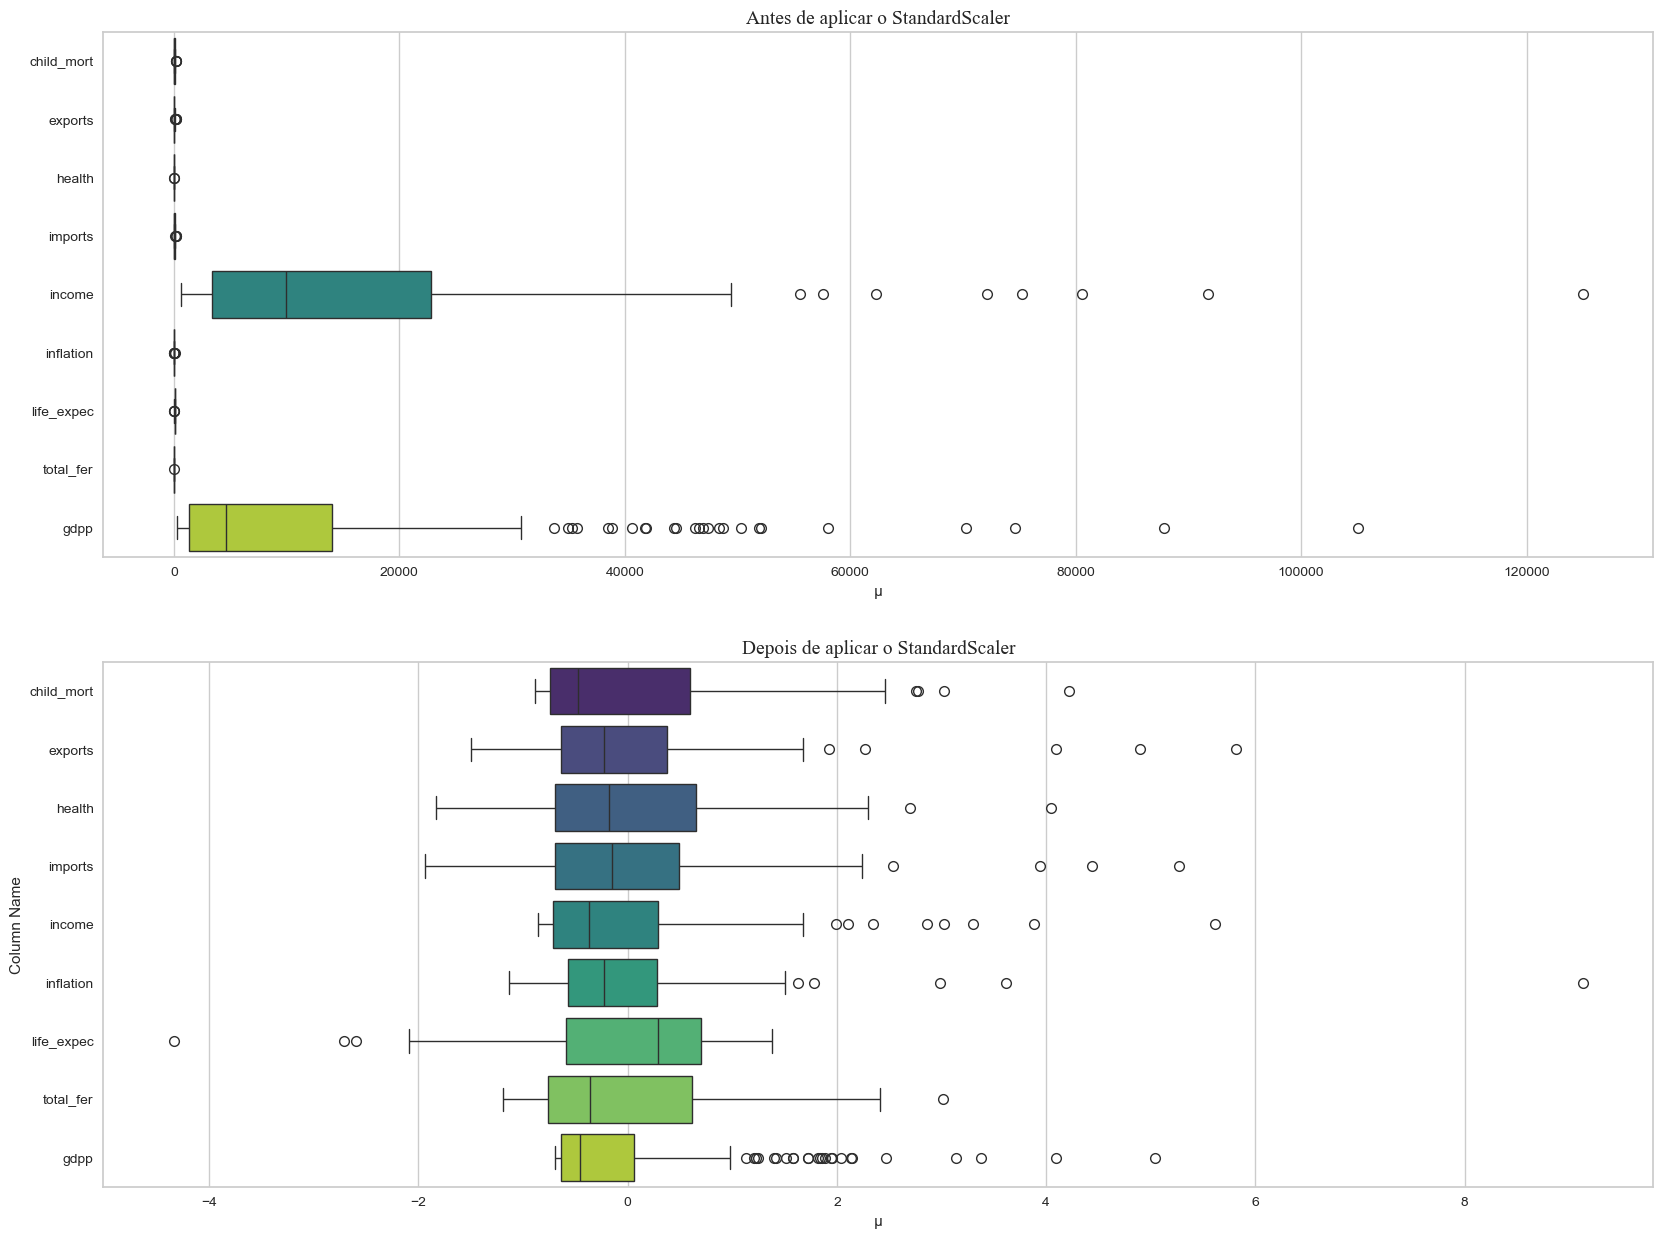

In [10]:
f, ax = plt.subplots(2, 1)
f.set_figheight(15)
f.set_figwidth(20)

sb.boxplot(dataset_raw, ax=ax[0], orient='h', palette='viridis')
sb.boxplot(
    data=dataset,
    ax=ax[1],
    orient='h',
    palette='viridis'
)

ax[0].set_title(f'Antes de aplicar o StandardScaler', fontfamily='Times New Roman', fontsize=14)
ax[0].set_xlabel('μ')
ax[1].set_title(f'Depois de aplicar o StandardScaler', fontfamily='Times New Roman', fontsize=14)
ax[1].set_xlabel('μ')
plt.show()

Comparando os dois gráficos _box-plot_ podemos observar uma mudança na distribuição tornando-as mais padronizadas. A primeira impressão parece que os valores menores foram _puxados_ para cima para que se igualassem ao _income_ e _gdpp_ - essa impressão se dá pela mudança de escala - mas o que aconteceu na verdade foi o inverso: o _income_ e _gdpp_ foram _puxados_ para perto da média (μ).

## Dendrogramas, análise e conclusões

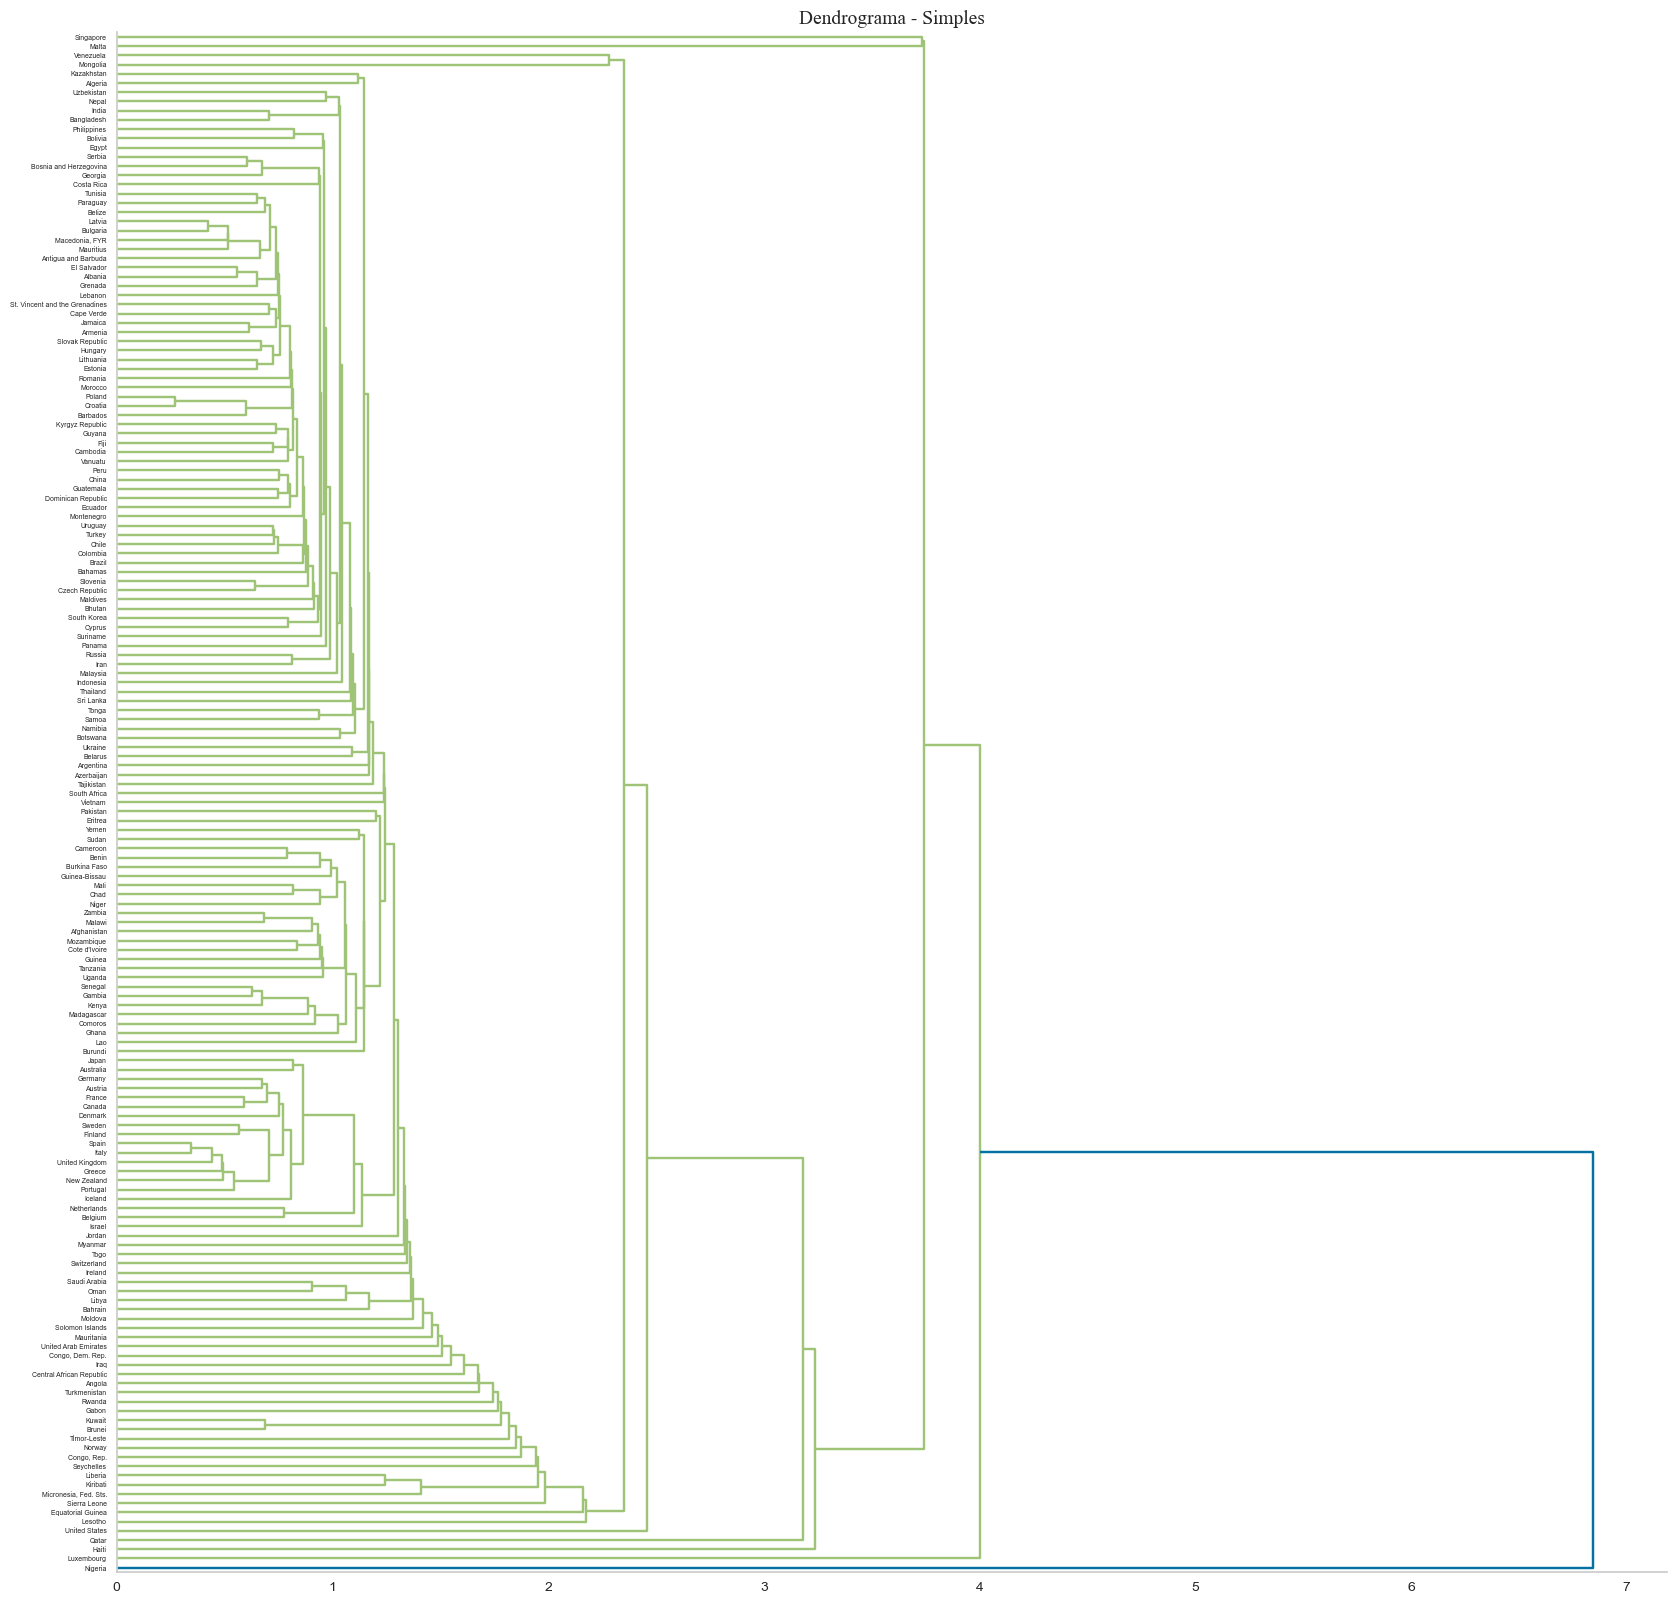

In [11]:
f, ax = plt.subplots(1, 1)
f.set_figheight(20)
f.set_figwidth(20)

single_link = hierarchy.linkage(
    dataset,
    metric='euclidean',
    method='single'
)

hierarchy.dendrogram(
    single_link,
    labels=dataset_raw['country'].values,
    ax=ax,
    orientation='right'
)

ax.set_title('Dendrograma - Simples', fontfamily='Times New Roman', fontsize=14)

ax.grid(False)
sb.despine()

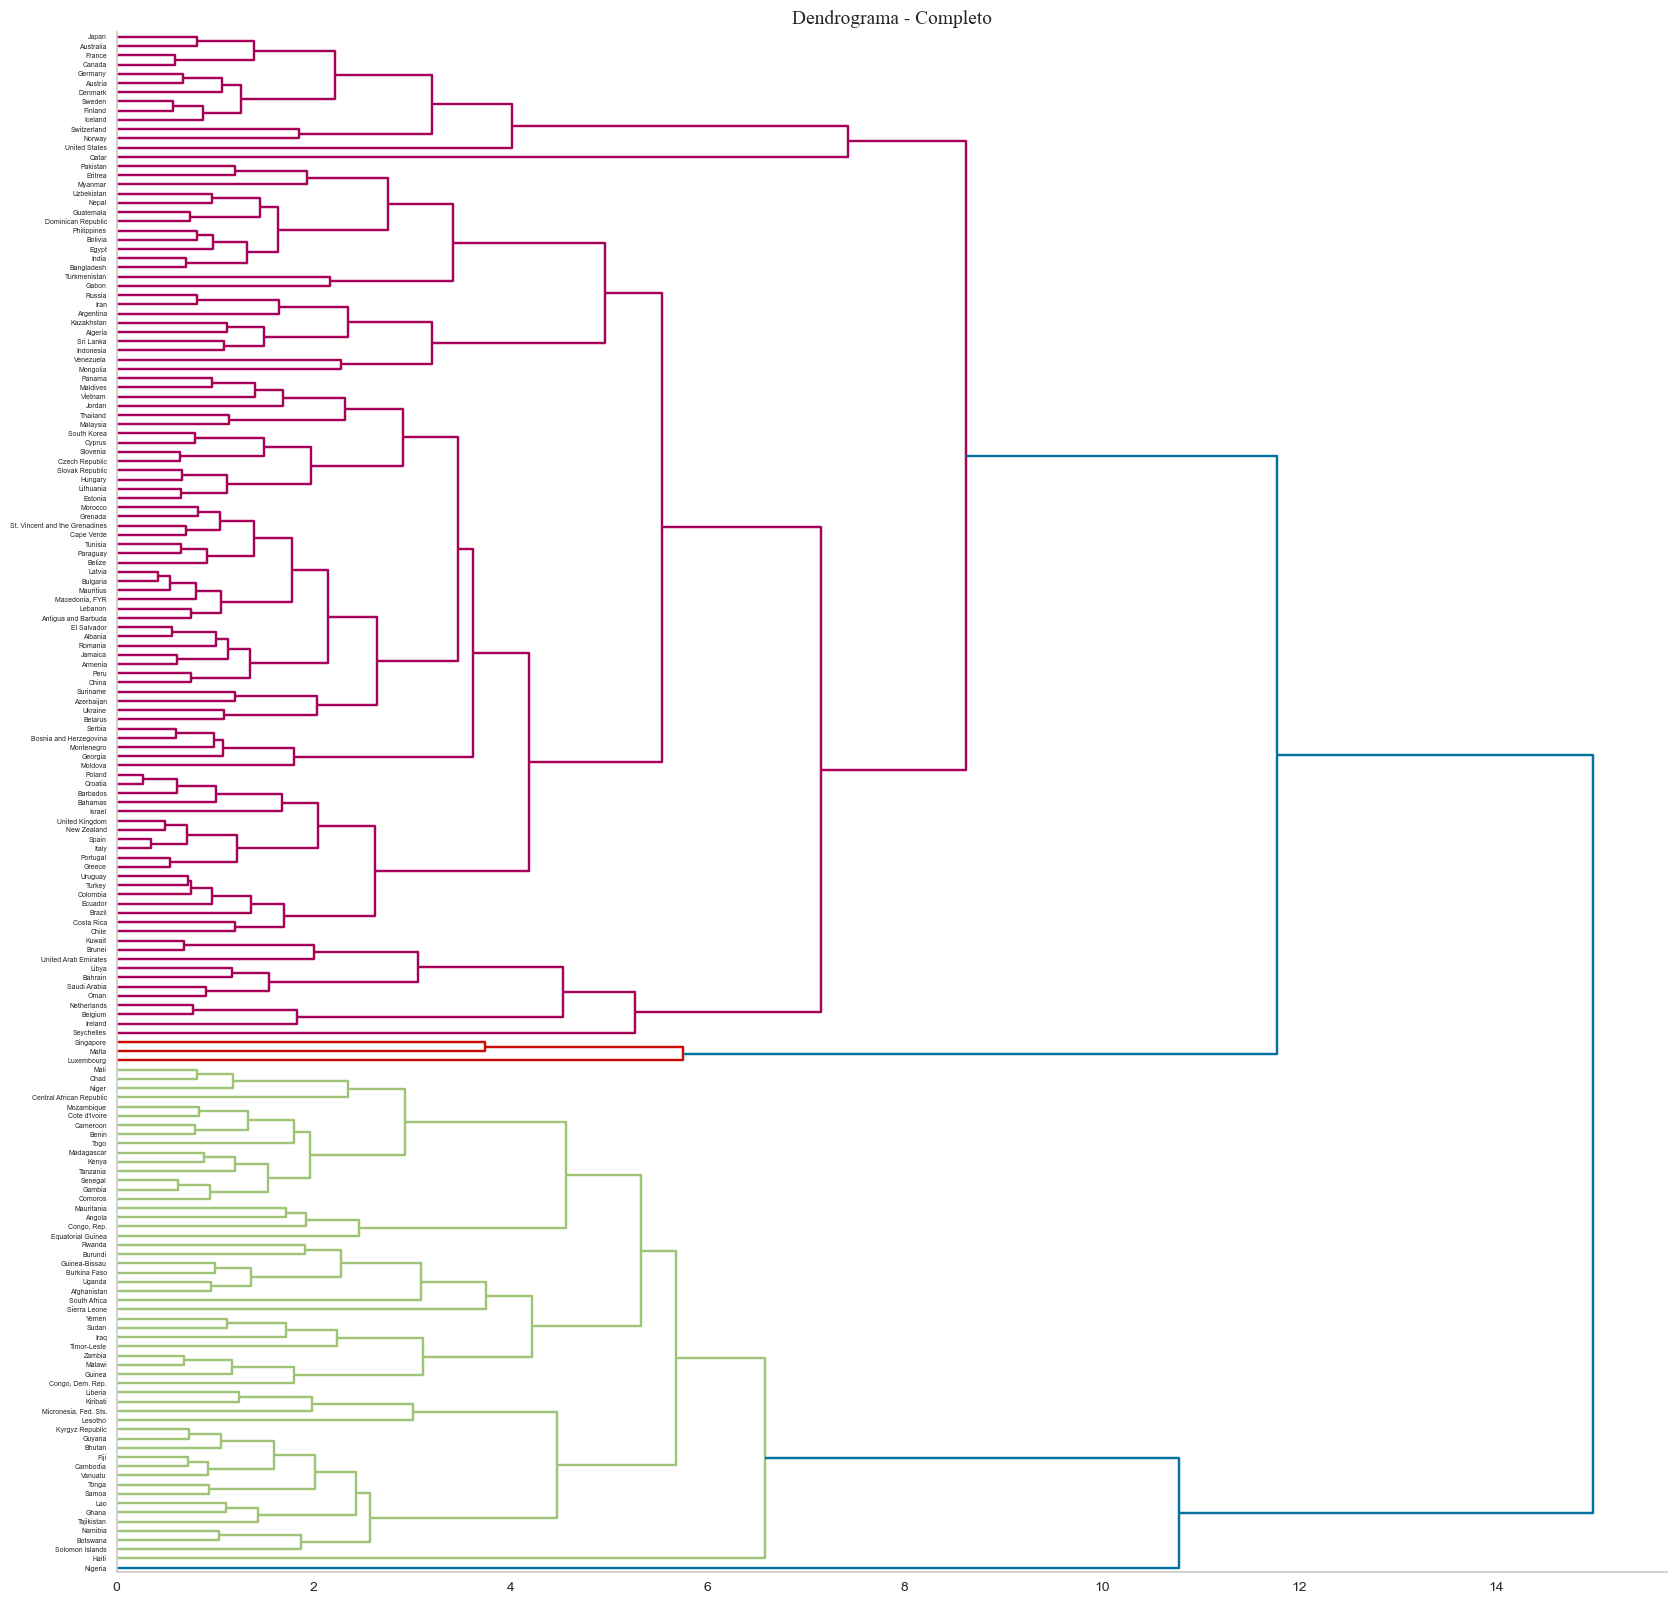

In [12]:
f, ax = plt.subplots(1, 1)
f.set_figheight(20)
f.set_figwidth(20)

complete_link = hierarchy.linkage(
    dataset,
    metric='euclidean',
    method='complete'
)

hierarchy.dendrogram(
    complete_link,
    labels=dataset_raw['country'].values,
    ax=ax,
    orientation='right'
)

ax.set_title('Dendrograma - Completo', fontfamily='Times New Roman', fontsize=14)

ax.grid(False)
sb.despine()

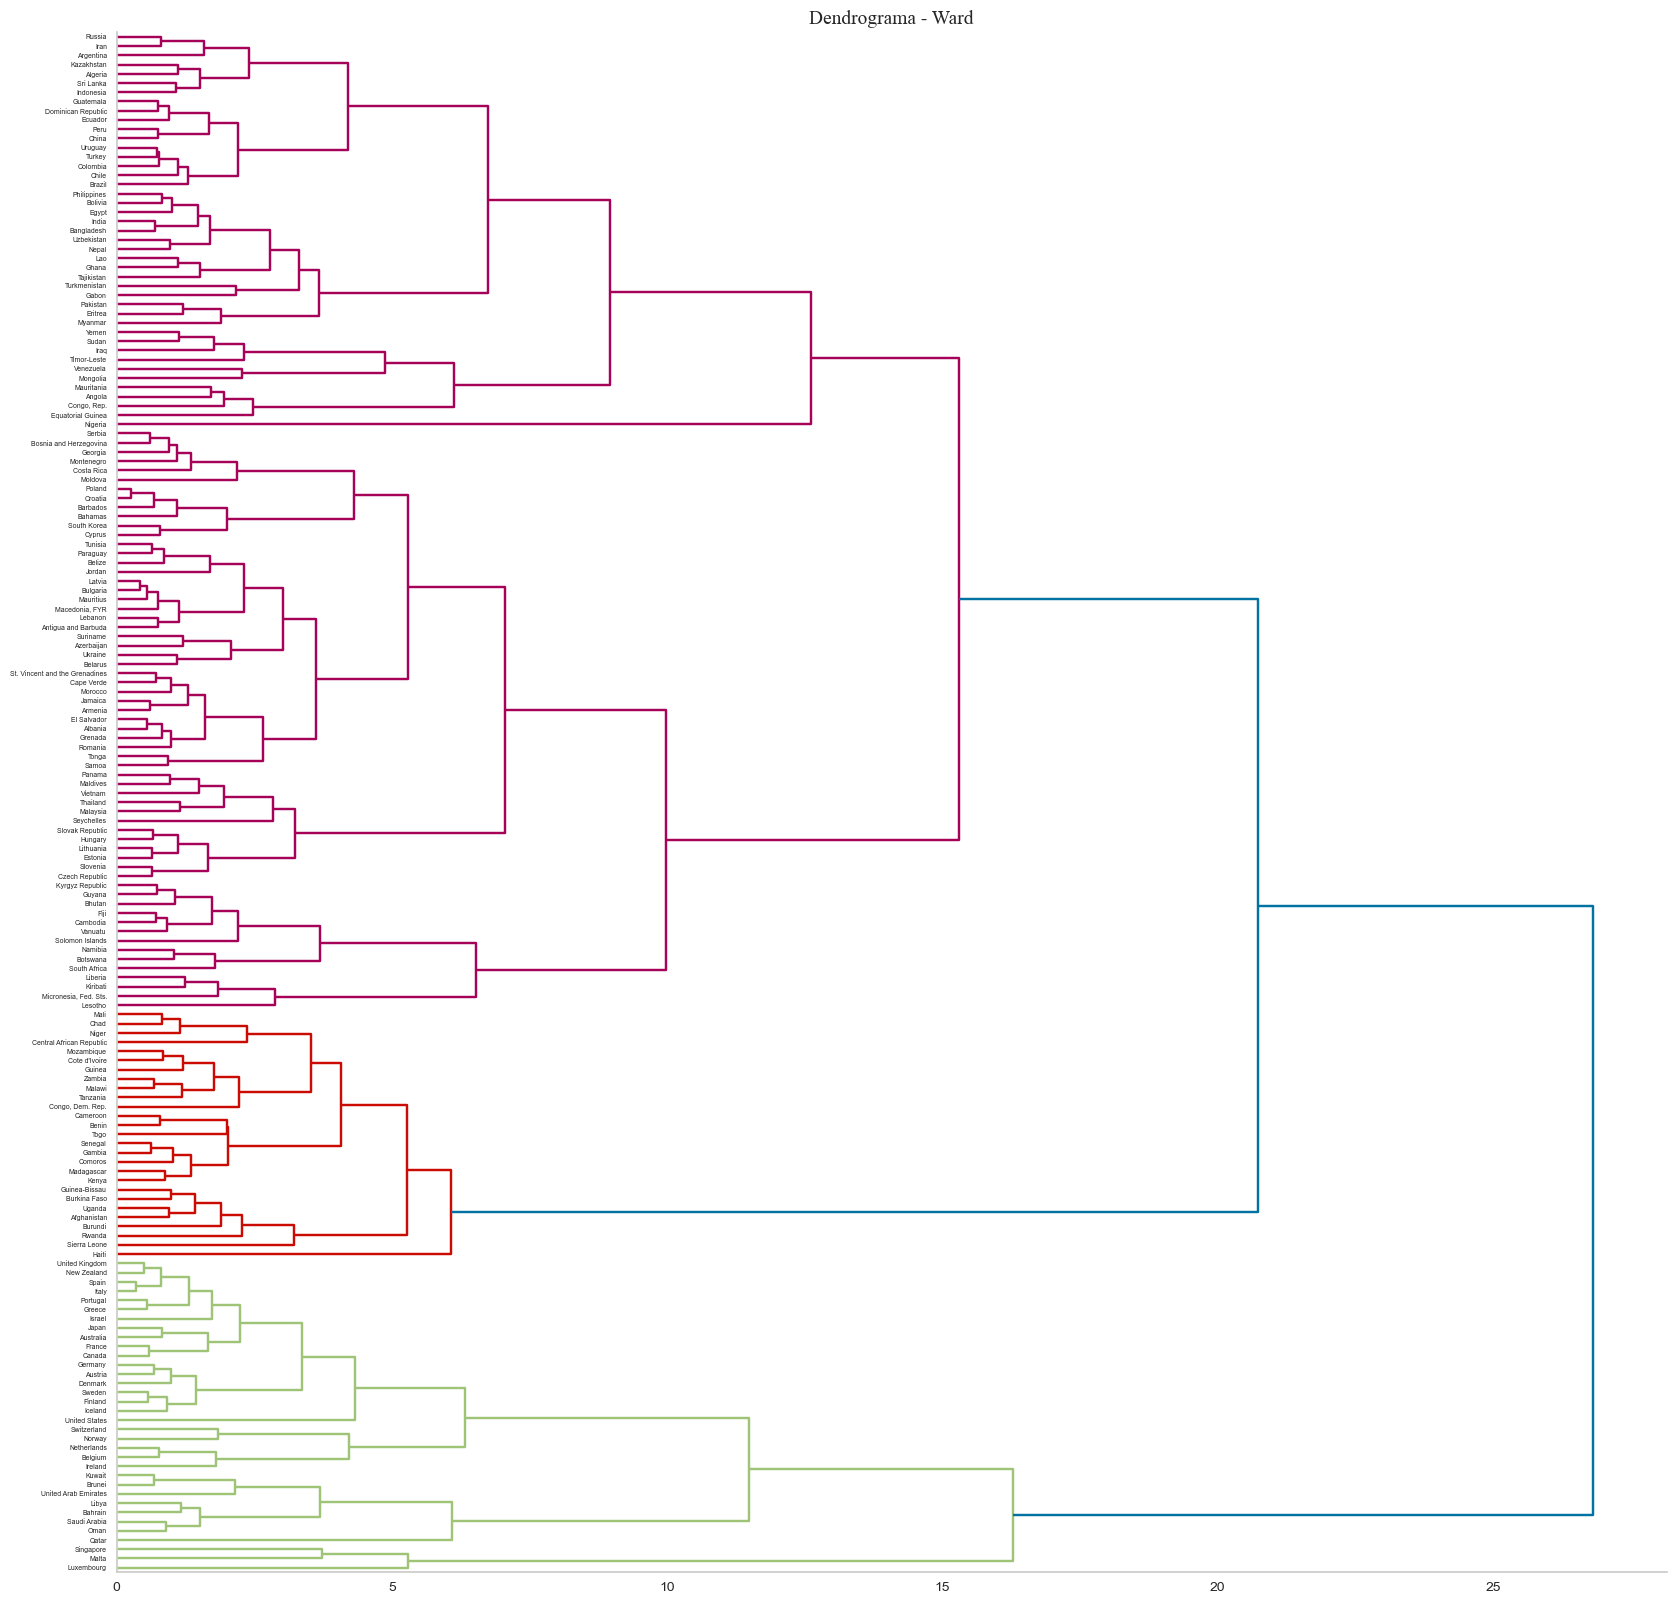

In [13]:
f, ax = plt.subplots(1, 1)
f.set_figheight(20)
f.set_figwidth(20)

ward_link = hierarchy.linkage(
    dataset,
    metric='euclidean',
    method='ward'
)

hierarchy.dendrogram(
    ward_link,
    labels=dataset_raw['country'].values,
    ax=ax,
    orientation='right'
)

ax.set_title('Dendrograma - Ward', fontfamily='Times New Roman', fontsize=14)

ax.grid(False)
sb.despine()

<div align="center">

|  Dendrograma   | Conclusões                                                                                                                                                                                                                        |
|:-----------:|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  Simples  | Visualmente difícil de analisar, não é o mais recomendável leitura visual. |
|  Completo  | Separou em três grupos distintos. Dois deles foram claramente pelas caracteristicas socioeconômicas contidos no _datasheet_, separando-os entre os _mais_ e _menos_ desenvolvidos e o grupo menor como os países que se afastaram demais destes dois grupos e não puderam ser agrupados. |
| Ward | Separou em três grupos distintos de forma clara pelas caracteristicas socioeconômicas, sem excluir nenhum deles.  |

</div>

## Índice de Silhueta

In [14]:
X, labels = make_blobs(n_samples=N_COUNTRIES, n_features=2, random_state=42)

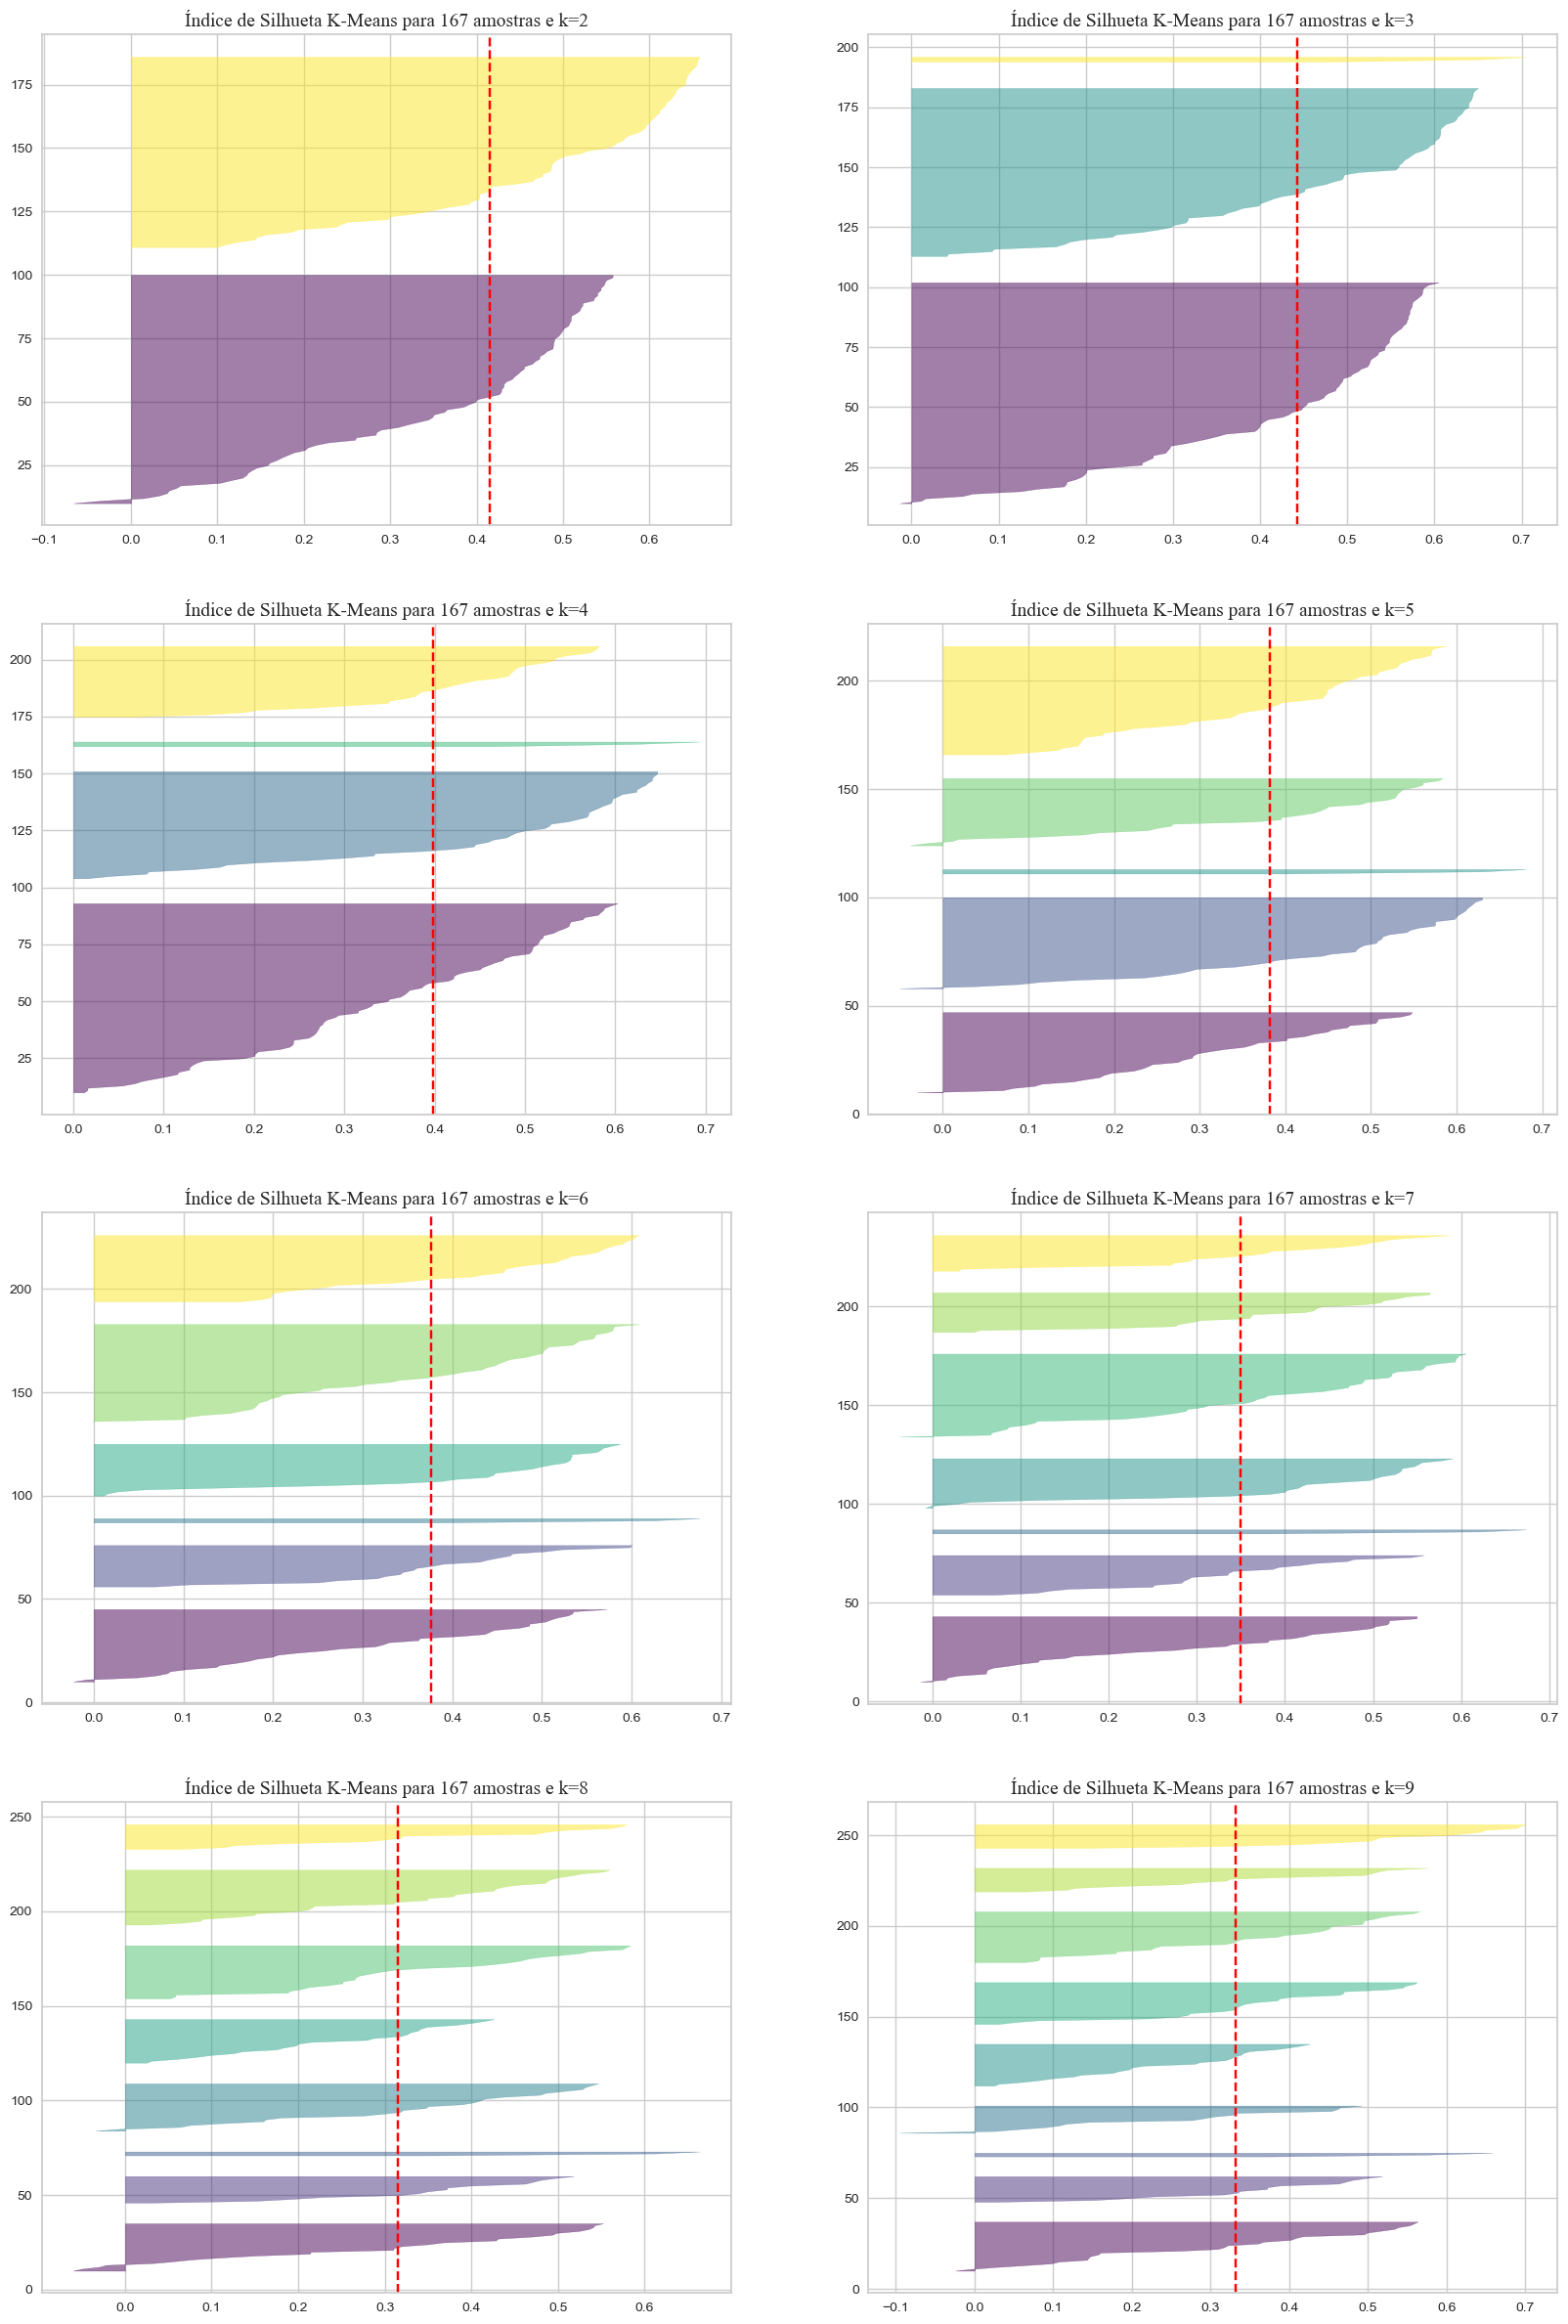

In [25]:
f, ax = plt.subplots(4, 2)
f.set_figheight(30)
f.set_figwidth(20)

for i in range(2,10):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    q, mod = divmod(i, 2)
    sv = SilhouetteVisualizer(
        kmeans,
        colors='viridis',
        is_fitted='auto',
        ax=ax[q-1][mod-2]
    )
    ax[q-1][mod-2].set_title(f'Índice de Silhueta K-Means para {len(X)} amostras e k={i}', fontfamily='Times New Roman', fontsize=14)
    sv.fit(dataset_pca)

<div align="center">

|  Clusters   | Conclusões                                                                                                                                                                                                                        |
|:-----------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  k=2 e k=3  | Ambos os casos os clusters possuem as silhuetas muito grandes, indicando a necessidade de mais clusters.                                                                                                                          |
|  k=4 e k=5  | Apesar de k=4 possuir um cluster a menos que k=5, sua média é maior e suas sulhuetas não são tão maiores em comparação a mesma.<br/>A silhueta mais fina indica os dados discrepantes que não fora removidos no preprocessamento. |
| k=6 até k=9 | Tamanho não igualitário entre os clusters. Visivelmente há clusters menores e outros maiores, o que indica excesso de clusters.                                                                                                   |

</div>

## Método Cotovelo

Também foi utilizado o Método do Cotovelo para descobrir a quantidade ótima de clusters, o que confirmou que o resultado do método anterior.

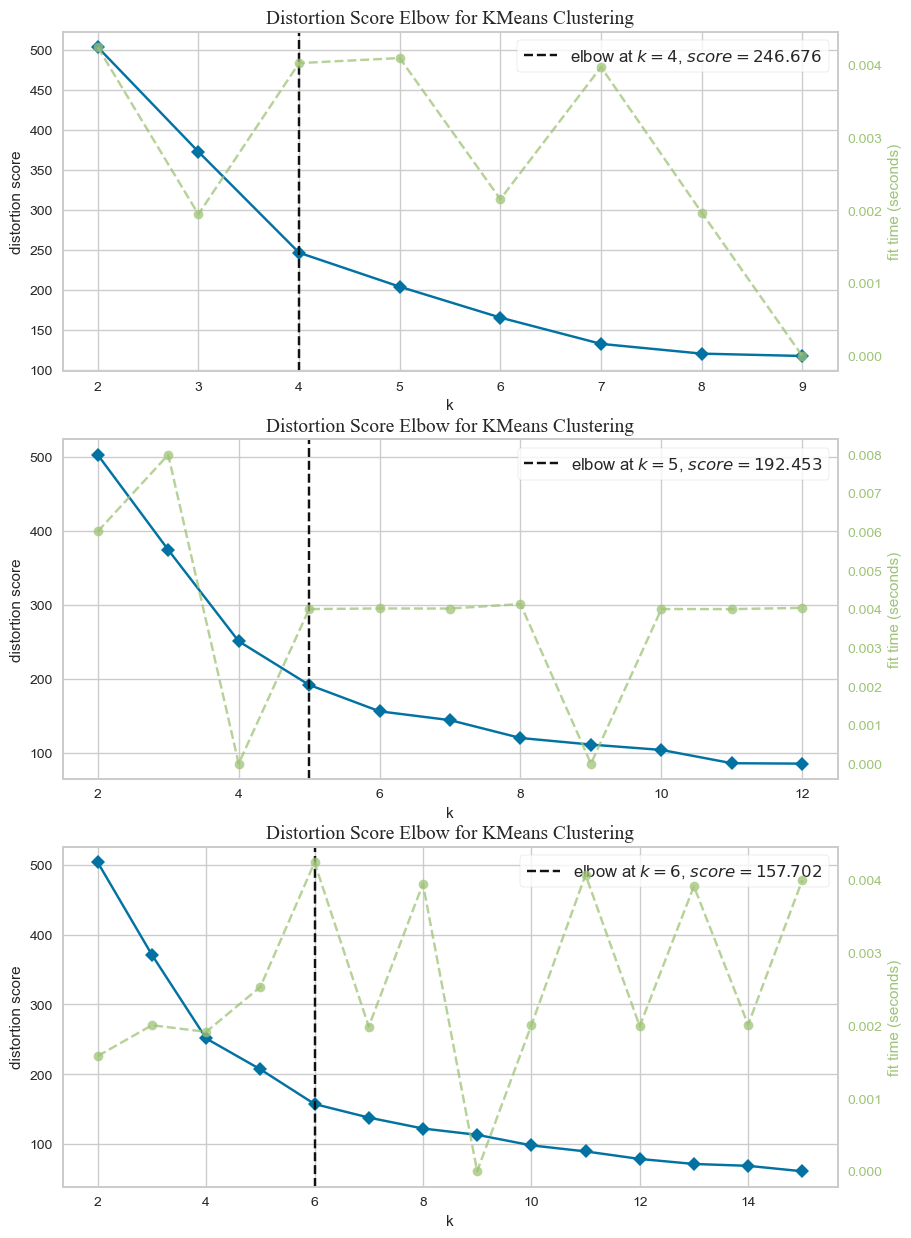

In [30]:
f, ax = plt.subplots(3)
f.set_figheight(15)
f.set_figwidth(10)

v1 = KElbowVisualizer(KMeans(n_init='auto'), k=9, ax=ax[0])
v1.fit(dataset_pca)
v1.finalize()

v2 = KElbowVisualizer(KMeans(n_init='auto'), k=12, ax=ax[1])
v2.fit(dataset_pca)
v2.finalize()

v3 = KElbowVisualizer(KMeans(n_init='auto'), k=15, ax=ax[2])
v3.fit(dataset_pca)
v3.finalize()

for x in range(len(ax)):
    ax[x].set_title(label="Distortion Score Elbow for KMeans Clustering", fontfamily='Times New Roman', fontsize=14)

plt.show()

Define como variável global a quantidade ótima de clusters encontrada para utiliza-la como entrada.

In [27]:
OPTIMAL_NCLUSTERS=4

## Execução K-Means, Hierarquical Agglomerative e DBSCAN para k=3

In [18]:
hues = pd.Series()
EPS=0.35
NCLUSTERS=3

kmeans = KMeans(n_clusters=NCLUSTERS, n_init='auto').fit(dataset_pca)
hues['kmeans'] = kmeans.labels_

ward = AgglomerativeClustering(n_clusters=NCLUSTERS, linkage='ward', metric='euclidean').fit(dataset_pca)
hues['ward'] = ward.labels_

dbscan = DBSCAN(eps=EPS, min_samples=5, n_jobs=-1, metric='euclidean').fit(dataset_pca)
hues['dbscan'] = dbscan.fit_predict(dataset_pca)

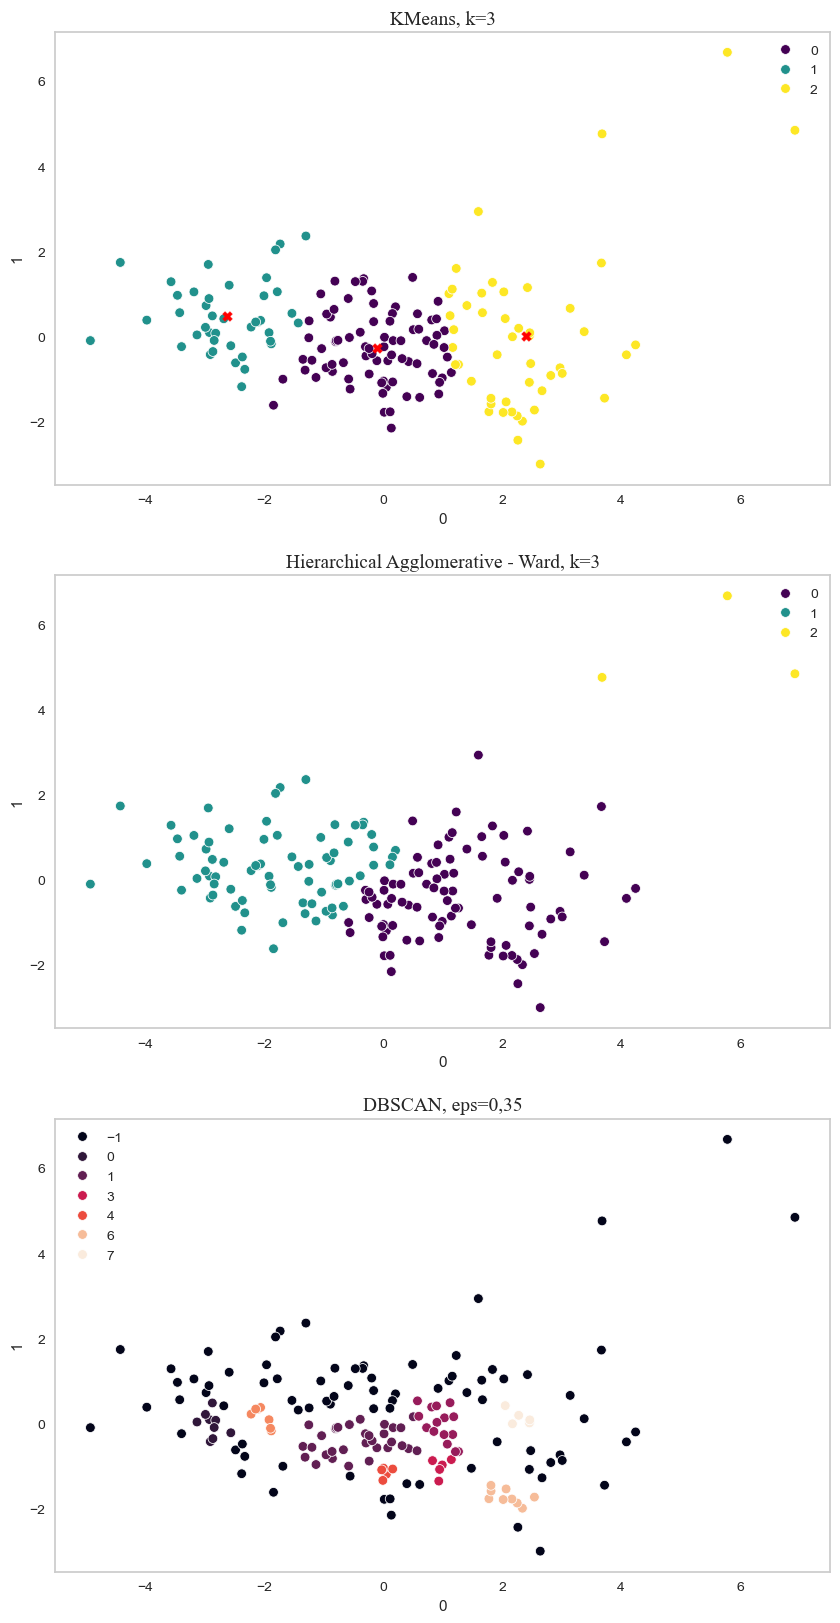

In [19]:
f, ax = plt.subplots(3, 1)
f.set_figheight(20)
f.set_figwidth(10)

dataset_pca = pd.DataFrame(dataset_pca)

sb.scatterplot(
    data=dataset_pca,
    x=0,
    y=1,
    hue=hues['kmeans'],
    palette='viridis',
    ax=ax[0]
)

ax[0].scatter(
    [x for x, _ in kmeans.cluster_centers_],
    [y for _, y in kmeans.cluster_centers_],
    marker='X',
    color='red'
)

kmeans_lm = sb.scatterplot(
    data=dataset_pca,
    x=0,
    y=1,
    hue=hues['ward'],
    palette='viridis',
    ax=ax[1]
)


sb.scatterplot(
    data=dataset_pca,
    x=0,
    y=1,
    hue=hues['dbscan'],
    palette='rocket',
    ax=ax[2]
)

ax[0].set_title(f'KMeans, k={NCLUSTERS}', fontfamily='Times New Roman', fontsize=14)
ax[1].set_title(f'Hierarchical Agglomerative - Ward, k={NCLUSTERS}', fontfamily='Times New Roman', fontsize=14)
ax[2].set_title(f'DBSCAN, eps={RIGHT_dec_format(EPS)}', fontfamily='Times New Roman', fontsize=14)

ax[0].grid(False)
ax[1].grid(False)
ax[2].grid(False)

### Comparação entre K-Means e Hierarchical Agglomerative


| Algoritmo  | Conclusões                                                               |
|:-----------|:-------------------------------------------------------------------------|
| K-Means     | Os três grupos são separados conforme definimos de forma socioeconomica. Os países mais dispersos foram incluídos no grupo 1. Podemos verificar também que os grupos 0 e 2 são mais densos - respectivamentes - em comparação ao grupo 3.|
|  Hierarchical Agglomerative - Ward  | Foram divididos em três grupos. Um dos grupos somente para os países influênciados pelo _outliers_. Os outros dois foram divididos por caracteristicas socioeconomicas. |

### Países que melhores representam seu agrupamento

In [20]:
kmedoids = KMedoids(n_clusters=NCLUSTERS).fit(dataset_pca)

countries_meloids = []

for k in range(len(kmedoids.medoid_indices_)):
    countries_meloids.append(dataset_raw.iloc[kmedoids.medoid_indices_[k], 0])

countries_meloids

['Morocco', 'Benin', 'South Korea']

O melóide de cada cluster é o que melhor representa seu cluster.

## Execução K-Means, Hierarquical Agglomerative e DBSCAN para k=4 (Quantidade Ótima)

In [21]:
hues = pd.Series()
EPS=0.35

kmeans = KMeans(n_clusters=OPTIMAL_NCLUSTERS, n_init='auto').fit(dataset_pca)
hues['kmeans'] = kmeans.labels_

ward = AgglomerativeClustering(n_clusters=OPTIMAL_NCLUSTERS, linkage='ward', metric='euclidean').fit(dataset_pca)
hues['ward'] = ward.labels_

dbscan = DBSCAN(eps=EPS, min_samples=5, n_jobs=-1, metric='euclidean').fit(dataset_pca)
hues['dbscan'] = dbscan.fit_predict(dataset_pca)

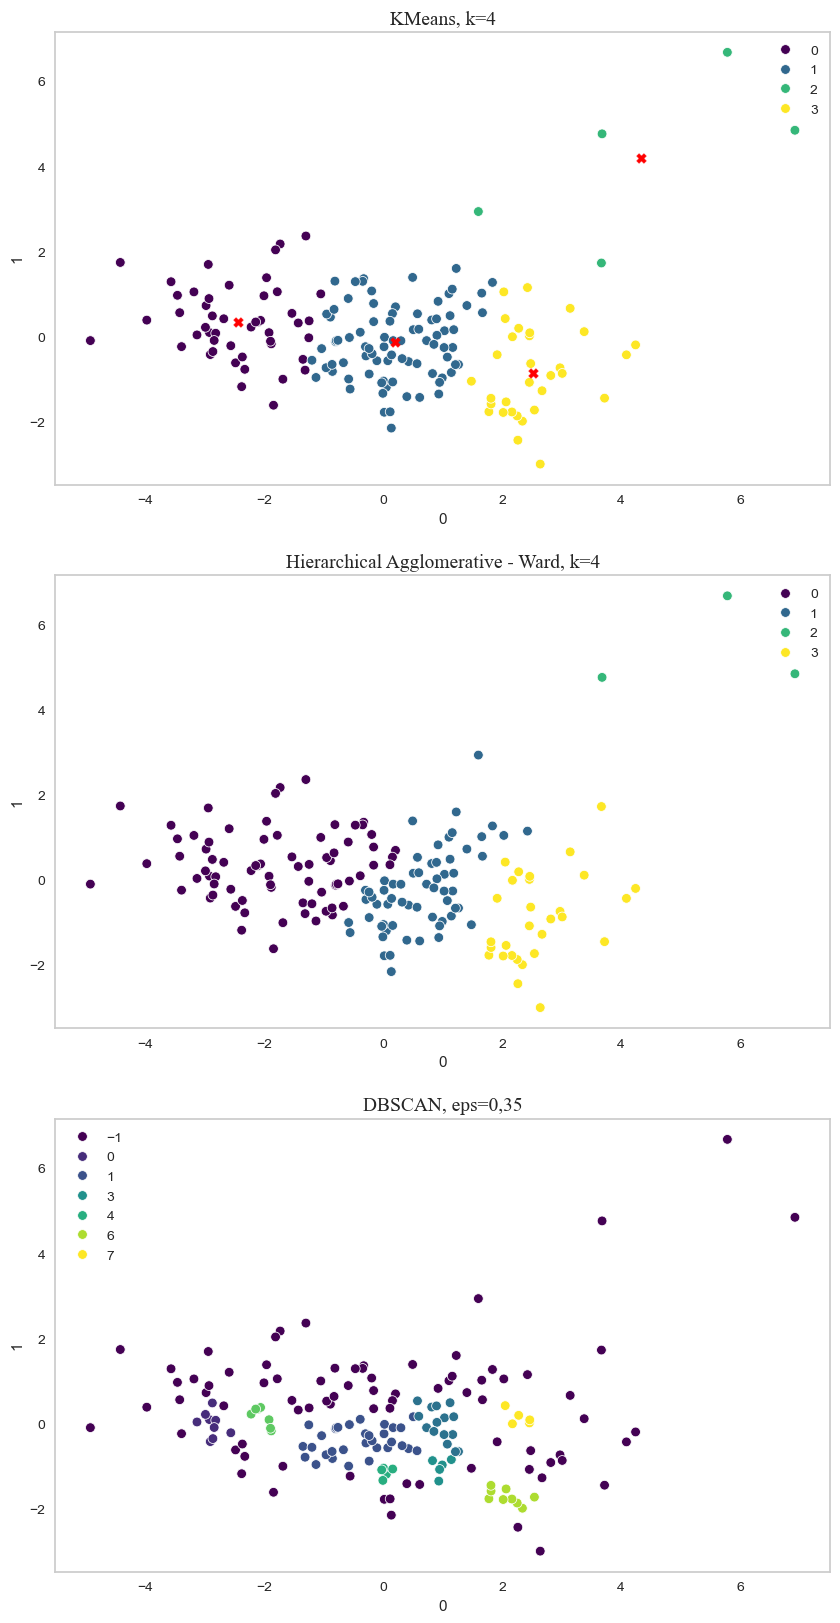

In [22]:
f, ax = plt.subplots(3, 1)
f.set_figheight(20)
f.set_figwidth(10)

dataset_pca = pd.DataFrame(dataset_pca)

sb.scatterplot(
    data=dataset_pca,
    x=0,
    y=1,
    hue=hues['kmeans'],
    palette='viridis',
    ax=ax[0]
)

ax[0].scatter(
    [x for x, _ in kmeans.cluster_centers_],
    [y for _, y in kmeans.cluster_centers_],
    marker='X',
    color='red'
)

kmeans_lm = sb.scatterplot(
    data=dataset_pca,
    x=0,
    y=1,
    hue=hues['ward'],
    palette='viridis',
    ax=ax[1]
)


sb.scatterplot(
    data=dataset_pca,
    x=0,
    y=1,
    hue=hues['dbscan'],
    palette='viridis',
    ax=ax[2]
)

ax[0].set_title(f'KMeans, k={OPTIMAL_NCLUSTERS}', fontfamily='Times New Roman', fontsize=14)
ax[1].set_title(f'Hierarchical Agglomerative - Ward, k={OPTIMAL_NCLUSTERS}', fontfamily='Times New Roman', fontsize=14)
ax[2].set_title(f'DBSCAN, eps={RIGHT_dec_format(EPS)}', fontfamily='Times New Roman', fontsize=14)

ax[0].grid(False)
ax[1].grid(False)
ax[2].grid(False)


## Outros experimentos

In [23]:
hues = pd.Series()
EPS=0.35
NCLUSTERS=3

kmeans = KMeans(n_clusters=NCLUSTERS, n_init='auto').fit(dataset_pca)
hues['kmeans'] = kmeans.labels_

ward = AgglomerativeClustering(n_clusters=NCLUSTERS, linkage='ward', metric='euclidean').fit(dataset_pca)
hues['ward'] = ward.labels_

dbscan = DBSCAN(eps=EPS, min_samples=5, n_jobs=-1, metric='euclidean').fit(dataset_pca)
hues['dbscan'] = dbscan.fit_predict(dataset_pca)

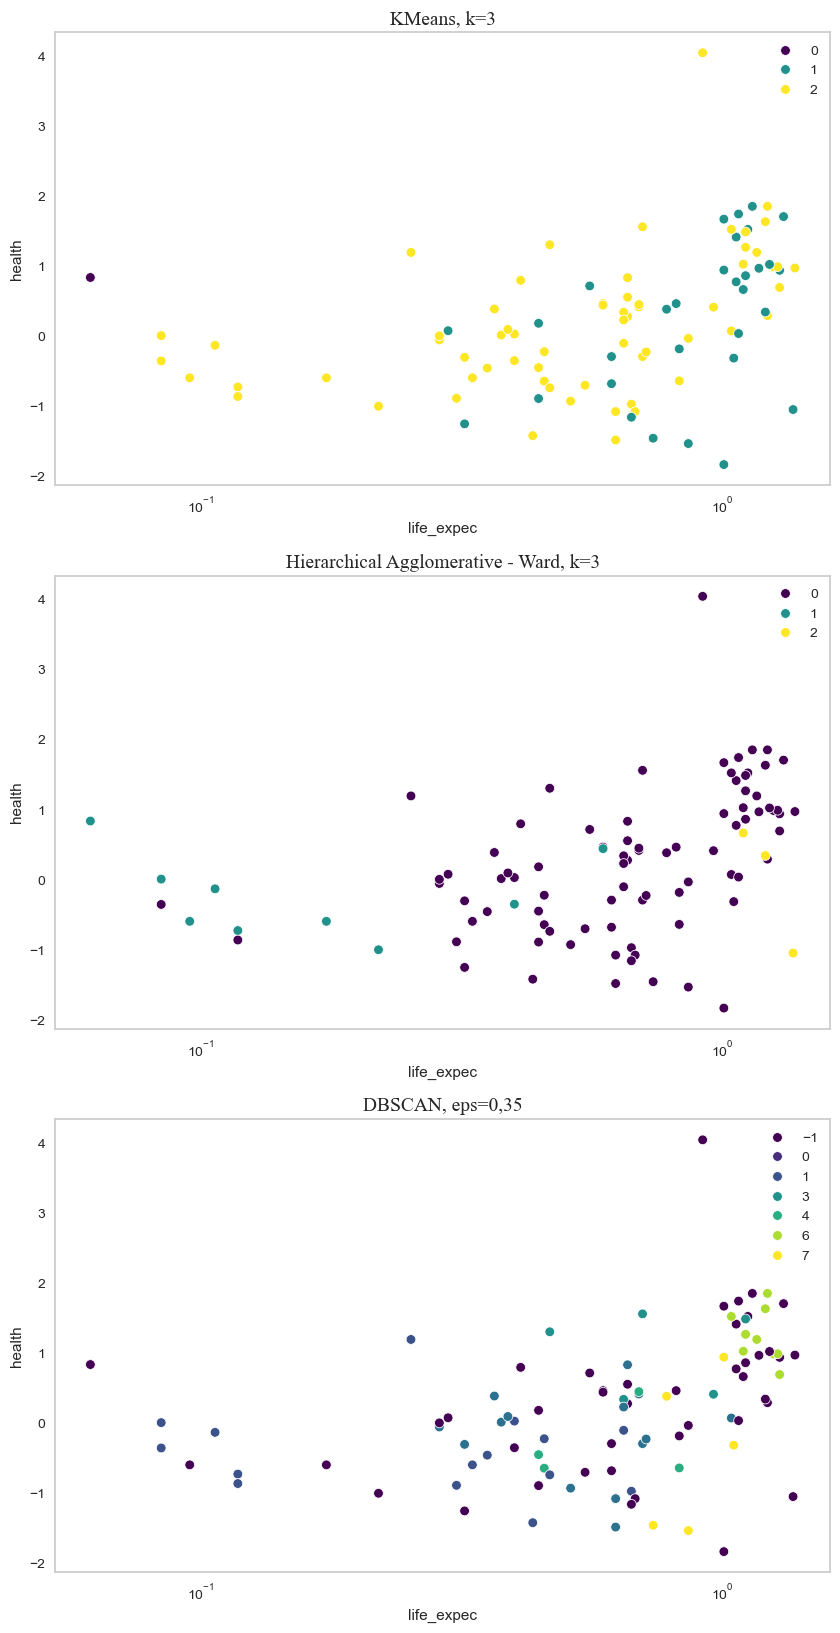

In [24]:
f, ax = plt.subplots(3, 1)
f.set_figheight(20)
f.set_figwidth(10)


sb.scatterplot(
    data=dataset,
    x='life_expec',
    y='health',
    hue=hues['kmeans'],
    palette='viridis',
    ax=ax[0]
)

# ax[0].scatter(
#     [x for x, _ in kmeans.cluster_centers_],
#     [y for _, y in kmeans.cluster_centers_],
#     marker='X',
#     color='red'
# )

kmeans_lm = sb.scatterplot(
    data=dataset,
    x='life_expec',
    y='health',
    hue=hues['ward'],
    palette='viridis',
    ax=ax[1]
)


sb.scatterplot(
    data=dataset,
    x='life_expec',
    y='health',
    hue=hues['dbscan'],
    palette='viridis',
    ax=ax[2]
)

ax[0].set_title(f'KMeans, k={NCLUSTERS}', fontfamily='Times New Roman', fontsize=14)
ax[1].set_title(f'Hierarchical Agglomerative - Ward, k={NCLUSTERS}', fontfamily='Times New Roman', fontsize=14)
ax[2].set_title(f'DBSCAN, eps={RIGHT_dec_format(EPS)}', fontfamily='Times New Roman', fontsize=14)

ax[0].grid(False)
ax[1].grid(False)
ax[2].grid(False)

ax[0].set_xscale('log')
ax[0].set_yscale('linear')

ax[1].set_xscale('log')
ax[1].set_yscale('linear')

ax[2].set_xscale('log')
ax[2].set_yscale('linear')

plt.show()